In [313]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

questions = pd.read_csv('data/questions.csv', parse_dates=['AskedOnUtc', 'TakenOnUtc', 'ClosedOnUtc', 'LegalDeadline'])
questions

,Id,StateAbbr,QuestionUno,CategoryUno,Category,SubcategoryUno,Subcategory,AskedByClientUno,AskedOnUtc,TakenByAttorneyUno,TakenOnUtc,ClosedByAttorneyUno,ClosedOnUtc,LegalDeadline
0,1,NC,BB53B2A4-7C1B-45C3-9693-62047889317D,C932D197-7F43-4BCF-BE0B-FE5F5DBCB9EF,Family and Children,E9F87919-0CD5-4D9D-AAC6-3CBC49132F1D,Family/Divorce/Custody/Visitation/Child Support,9C35423C-914A-42BC-8EBC-A370E76E2178,2019-06-19 22:10:06,NaN,NaT,NaN,2019-08-13 15:09:06,2019-07-08 00:00:00
1,2,NC,0C49F841-2782-4313-961E-7882B96D0854,C8E1275A-6C42-42E4-9B7D-231BAC438FC9,Individual Rights,73A59926-BA0B-44EC-ABF3-F4C9181EEA83,Civil/Constitutional Rights,DF636AEE-7D08-4F90-9A5C-0A2A726C6B59,2019-06-19 23:34:36,NaN,NaT,NaN,2019-08-13 15:09:14,NaN
2,3,NC,BFC28E08-B6B1-4185-A91A-89DF90816BE4,C8E1275A-6C42-42E4-9B7D-231BAC438FC9,Individual Rights,73A59926-BA0B-44EC-ABF3-F4C9181EEA83,Civil/Constitutional Rights,DF636AEE-7D08-4F90-9A5C-0A2A726C6B59,2019-06-19 23:57:18,FA34142B-1575-4720-981C-2D28C3560137,2019-06-22 02:37:16,FA34142B-1575-4720-981C-2D28C3560137,2019-06-24 19:02:35,NaN
3,4,NC,45B24109-243A-489B-B0D2-2F36C2A369FE,C932D197-7F43-4BCF-BE0B-FE5F5DBCB9EF,Family and Children,E9F87919-0CD5-4D9D-AAC6-3CBC49132F1D,Family/Divorce/Custody/Visitation/Child Support,C9C3FA40-0D60-49B9-97F1-63AFEFAFA484,2019-06-20 02:33:14,FA34142B-1575-4720-981C-2D28C3560137,2019-07-27 18:04:08,FA34142B-1575-4720-981C-2D28C3560137,2019-07-31 05:49:18,NaN
4,5,NC,C4707F71-FE4A-4154-8174-AF00BEE2B361,F6016FBD-9501-4448-BCD3-BBB0E834E33B,Consumer Financial Questions,73FE486E-2B51-456A-A6D9-78A7D05802AA,"Bankruptcy, Debts & Purchases",ED7DEA10-CDB7-4A05-891D-889D1EA710BE,2019-06-20 17:04:47,NaN,NaT,NaN,2019-08-13 15:09:20,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202874,202875,NC,376FFF48-9068-4A8F-9316-2EB5A7E38001,E6F4FD7C-FCE9-4763-AADD-0544158DE0BB,Other,E3257971-6837-4BAD-B00D-E4040F0C8B8A,Civil Procedure,82BDD11F-2168-4A44-BBFC-BA9B0543F289,2019-06-17 20:37:01,6E43EC98-8700-4439-98A9-52B663CCE348,2019-07-17 19:22:29,6E43EC98-8700-4439-98A9-52B663CCE348,2019-07-27 19:26:43,NaN
202875,202876,NC,98AA49B1-D423-4D12-9E70-A5BD6663DFE5,E6F4FD7C-FCE9-4763-AADD-0544158DE0BB,Other,E3257971-6837-4BAD-B00D-E4040F0C8B8A,Civil Procedure,FF2959DA-CCA4-415A-BA9B-2D51F860C08D,2019-06-18 13:06:00,FA34142B-1575-4720-981C-2D28C3560137,2019-06-22 03:07:59,FA34142B-1575-4720-981C-2D28C3560137,2019-06-24 19:02:56,2019-06-18 00:00:00
202876,202877,NC,B80305AA-7509-436E-AFF8-6B33AC682730,E6F4FD7C-FCE9-4763-AADD-0544158DE0BB,Other,E3257971-6837-4BAD-B00D-E4040F0C8B8A,Civil Procedure,35133217-A30F-42A7-8EB4-E15A03026247,2019-06-18 15:33:13,NaN,NaT,NaN,2019-08-13 15:10:18,2019-06-27 00:00:00
202877,202878,NC,DC374484-7C6E-44A3-9DB7-89B8868518F1,E6F4FD7C-FCE9-4763-AADD-0544158DE0BB,Other,26D3CE4B-3540-477E-BA03-78EF65769A12,Other,A40F8543-330C-43A1-97AC-53C01FD4013E,2019-06-19 03:23:46,6E43EC98-8700-4439-98A9-52B663CCE348,2019-06-24 14:47:57,6E43EC98-8700-4439-98A9-52B663CCE348,2019-06-28 21:59:13,2019-07-01 00:00:00


<Axes: xlabel='Category'>

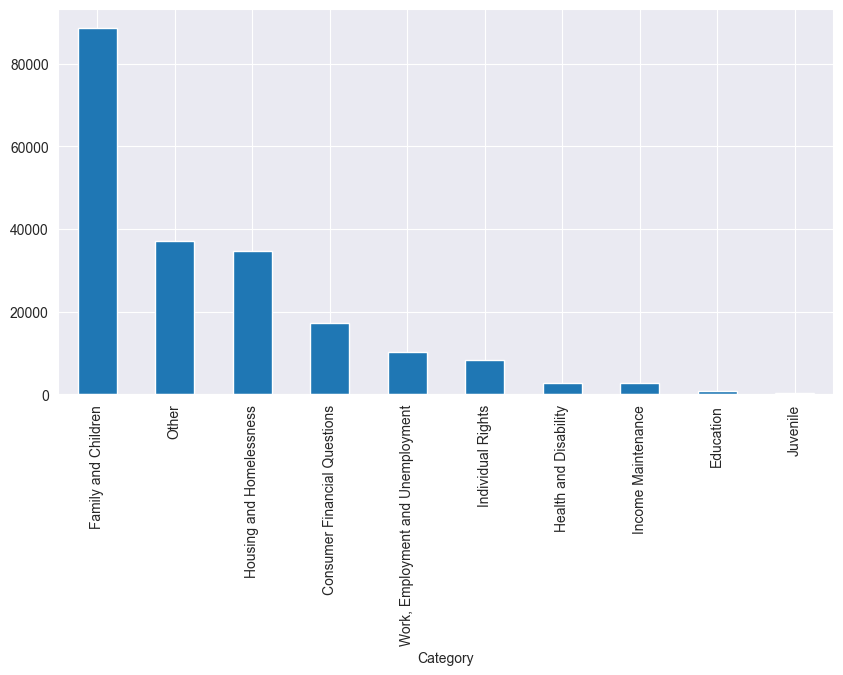

In [314]:
categories = questions['Category'].value_counts()
categories.plot(kind='bar', figsize=(10, 5))

In [344]:
answered = (questions.groupby('Category')
                      .count()['TakenByAttorneyUno']
                      .sort_values(ascending=False)
)
categories_answered = pd.concat([categories, answered], axis=1)
categories_answered.columns = ['Asked', 'Answered']
categories_answered

,Asked,Answered
Category,,
Family and Children,88753,63356
Other,37053,24454
Housing and Homelessness,34755,26253
Consumer Financial Questions,17273,12917
"Work, Employment and Unemployment",10187,7235
Individual Rights,8312,4935
Health and Disability,2707,1697
Income Maintenance,2688,1644
Education,794,514


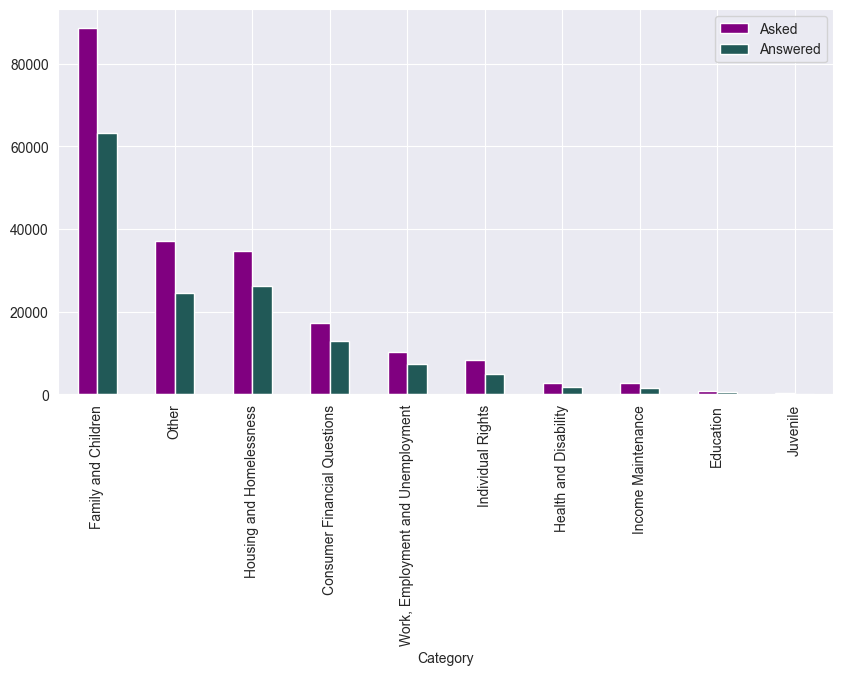

In [350]:
categories_answered.plot(kind='bar', y=['Asked', 'Answered'], figsize=(10, 5), color=['purple', '#215957'])
plt.savefig('SupDem_Bar.png', dpi=450, transparent=True)

<Axes: xlabel='Category'>

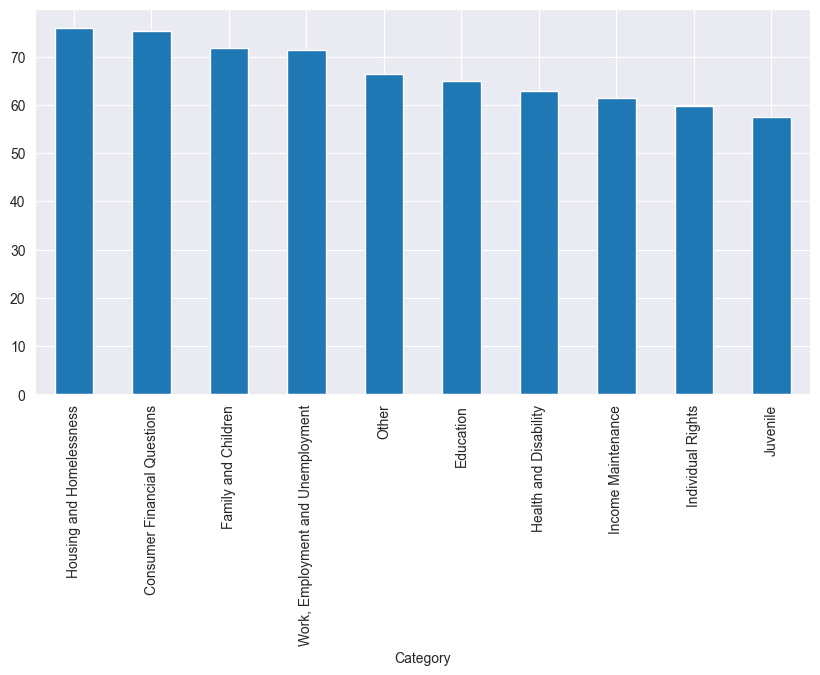

In [317]:
categories_answered['Answered %'] = categories_answered['Answered'] / categories_answered['Asked'] * 100
categories_answered.sort_values(by='Answered %', ascending=False, inplace=True)
categories_answered['Answered %'].plot(kind='bar', figsize=(10, 5))

In [318]:
questions['timeToAssign'] = pd.to_timedelta(questions['TakenOnUtc'] - questions['AskedOnUtc'])
questions['timeToAnswer'] = pd.to_timedelta(questions['ClosedOnUtc'] - questions['TakenOnUtc'])
questions['totalDuration'] = pd.to_timedelta(questions['ClosedOnUtc'] - questions['AskedOnUtc'])
questions.dropna(subset=['timeToAssign', 'timeToAnswer', 'totalDuration'], inplace=True)
questions.dtypes

Id                               int64
StateAbbr                       object
QuestionUno                     object
CategoryUno                     object
Category                        object
SubcategoryUno                  object
Subcategory                     object
AskedByClientUno                object
AskedOnUtc              datetime64[ns]
TakenByAttorneyUno              object
TakenOnUtc              datetime64[ns]
ClosedByAttorneyUno             object
ClosedOnUtc             datetime64[ns]
LegalDeadline                   object
timeToAssign           timedelta64[ns]
timeToAnswer           timedelta64[ns]
totalDuration          timedelta64[ns]
dtype: object

                                                timeToAssign   
Category                                                       
Consumer Financial Questions       8 days 15:19:42.905492482  \
Education                         14 days 00:25:30.923224568   
Family and Children               10 days 21:39:52.515752151   
Health and Disability             13 days 05:34:34.552463768   
Housing and Homelessness           8 days 13:36:47.578466398   
Income Maintenance                12 days 08:38:06.469143199   
Individual Rights                  9 days 04:31:02.630364372   
Juvenile                          10 days 19:05:21.400990099   
Other                              9 days 12:13:38.908731120   
Work, Employment and Unemployment 11 days 10:13:48.168811814   

                                                timeToAnswer   
Category                                                       
Consumer Financial Questions       9 days 11:33:59.648665234  \
Education                          6 da

<Axes: xlabel='Category'>

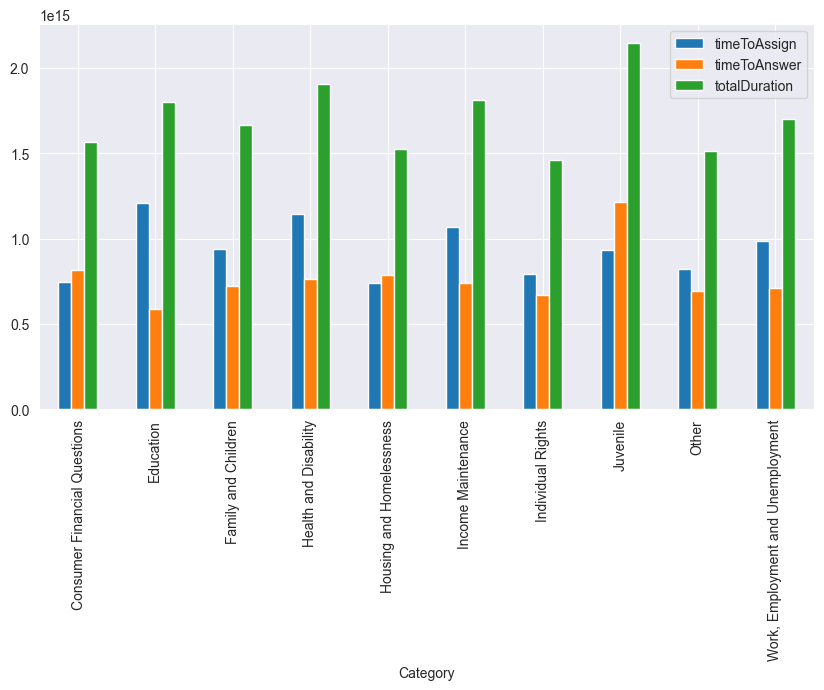

In [319]:
typical_durations = (questions.groupby('Category')
                               .agg({'timeToAssign': 'mean', 'timeToAnswer': 'mean', 'totalDuration': 'mean'})
)
print(typical_durations)
typical_durations.plot(kind='bar', figsize=(10, 5))

<Axes: ylabel='Frequency'>

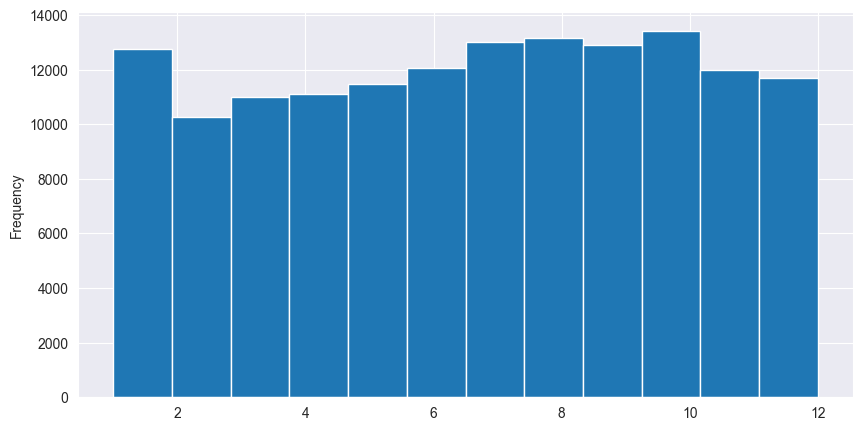

In [320]:
questions['MonthAsk'] = questions['AskedOnUtc'].dt.month
questions['MonthTaken'] = questions['TakenOnUtc'].dt.month
questions['Year'] = questions['AskedOnUtc'].dt.year
questions['Day'] = questions['AskedOnUtc'].dt.day
questions['DayOfWeek'] = questions['AskedOnUtc'].dt.dayofweek
questions['MonthAsk'].plot(kind='hist', bins=12, figsize=(10, 5))

<Axes: ylabel='Frequency'>

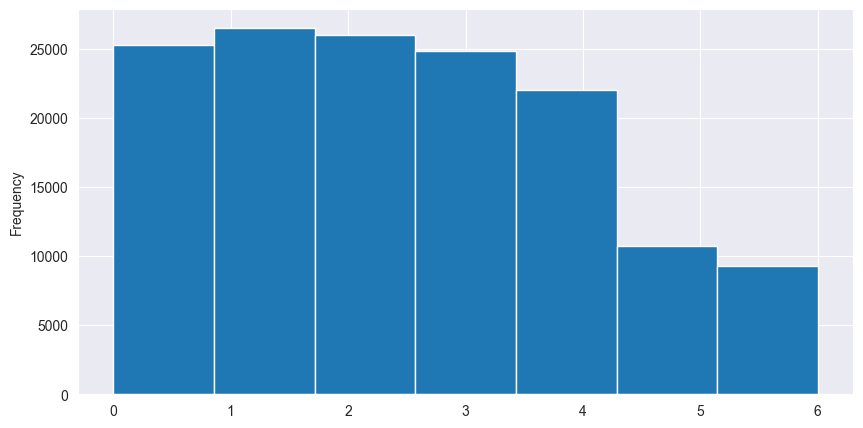

In [321]:
questions['DayOfWeek'].plot(kind='hist', bins=7, figsize=(10, 5))

In [322]:
ask_by_month = (questions.groupby(['MonthAsk', 'Category'])
            .count()['QuestionUno']
            )
ask_by_month = ask_by_month.unstack()
abm_norm = (ask_by_month - ask_by_month.mean()) / ask_by_month.std()
abm_norm
ask_by_month

Category,Consumer Financial Questions,Education,Family and Children,Health and Disability,Housing and Homelessness,Income Maintenance,Individual Rights,Juvenile,Other,"Work, Employment and Unemployment"
MonthAsk,,,,,,,,,,
1,1162,44,5886,148,2225,129,425,25,2082,619
2,1005,44,4541,140,1848,132,325,22,1727,488
3,1091,46,4907,136,1843,159,372,11,1875,556
4,977,35,4850,134,1955,152,368,13,1908,708
5,999,41,5202,115,2095,145,365,16,1888,615
6,1056,31,5388,119,2264,123,437,9,2029,601
7,1157,21,5672,162,2547,144,450,17,2180,659
8,1075,56,5859,152,2530,134,449,24,2194,673
9,1114,44,5650,185,2442,148,432,21,2255,625


In [323]:
taken_by_month = (questions.groupby(['MonthTaken', 'Category'])
                .count()['QuestionUno']
                )
taken_by_month = taken_by_month.unstack()
tbm_norm = (taken_by_month - taken_by_month.mean()) / taken_by_month.std()

In [324]:
maxAsk = abm_norm.idxmax(axis=1)
print(maxAsk)
maxTaken = tbm_norm.idxmax(axis=1)
print(maxTaken)

MonthAsk
1                              Juvenile
2                              Juvenile
3                    Income Maintenance
4     Work, Employment and Unemployment
5                    Income Maintenance
6                     Individual Rights
7              Housing and Homelessness
8                              Juvenile
9                 Health and Disability
10         Consumer Financial Questions
11                            Education
12                    Individual Rights
dtype: object
MonthTaken
1                              Juvenile
2                              Juvenile
3                             Education
4                    Income Maintenance
5                    Income Maintenance
6     Work, Employment and Unemployment
7              Housing and Homelessness
8                     Individual Rights
9                              Juvenile
10                Health and Disability
11                            Education
12                                Other
dtype:

Text(0.5, 23.52222222222222, 'Month')

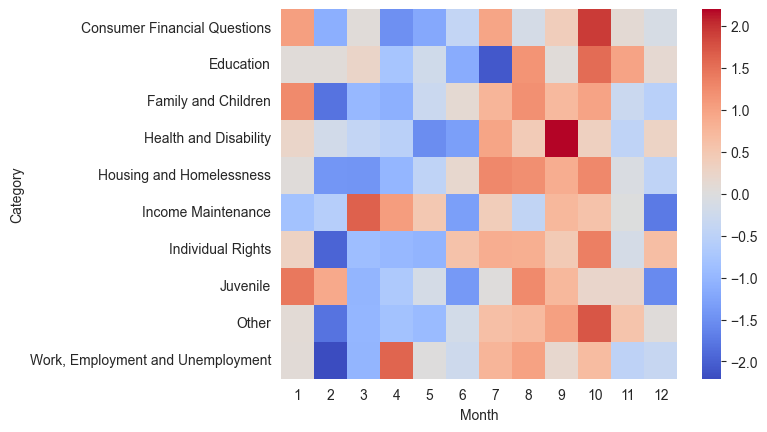

In [325]:
# Z-Scores of Questions Asked
ax = sns.heatmap(abm_norm.transpose(), cmap='coolwarm')
ax.set_xlabel('Month')

Text(0.5, 23.52222222222222, 'Month')

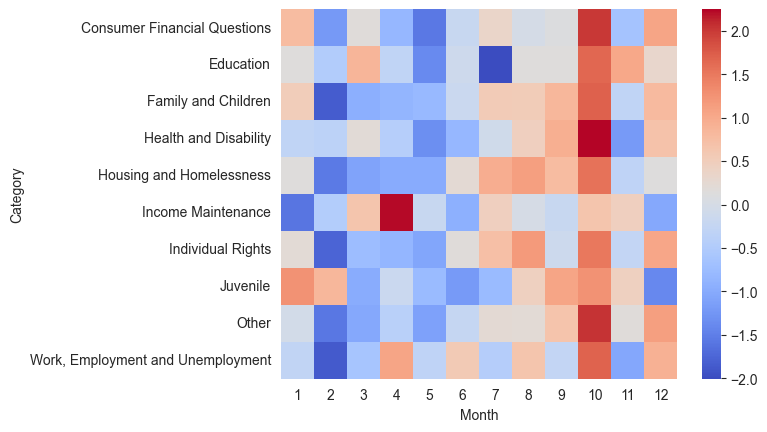

In [326]:
# Z-Scores of questions taken by lawyers
ax = sns.heatmap(tbm_norm.transpose(), cmap='coolwarm')
ax.set_xlabel('Month')

<Axes: xlabel='MonthAsk', ylabel='Category'>

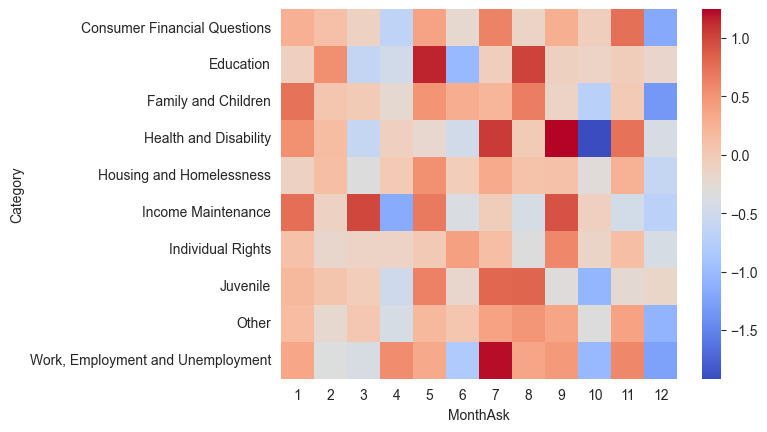

In [327]:
# Z-Score difference.
# Red = Blue
difference = abm_norm - tbm_norm
sns.heatmap(difference.transpose(), cmap='coolwarm')

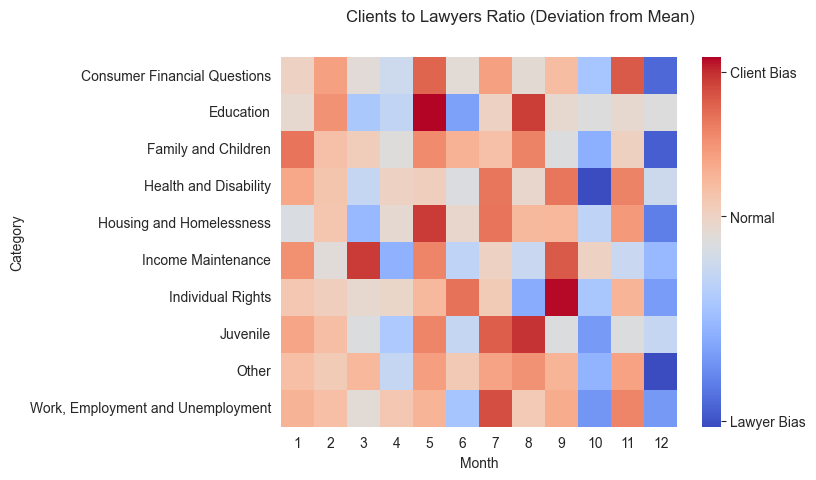

In [328]:
# Z-Score of the Difference in Volume
difference2 = ask_by_month - taken_by_month
difference2 = (difference2 - difference2.mean()) / difference2.std()
plt.suptitle('Clients to Lawyers Ratio (Deviation from Mean)')
ax = sns.heatmap(difference2.transpose(), cmap='coolwarm')
cbar = ax.collections[0].colorbar
cbar.set_ticks([1.7, 0, -2.4])
cbar.ax.set_yticklabels(['Client Bias','Normal', 'Lawyer Bias'])

#ax.hlines([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], *ax.get_xlim())
ax.set_xlabel('Month')
plt.savefig('SupDem_Heatmap_final.png', dpi=450, transparent=True)

In [329]:
# TODO - Gender is way out of balance